In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
data= pd.ExcelFile('xlwt example.xls')
do=pd.ExcelFile('Output.xls')
X = pd.read_excel(data)
Y=pd.read_excel(do)
X_train= X.iloc[0:40000]
X_val=X.iloc[40000:50000]
Y_train=Y.iloc[0:40000]
Y_val=Y.iloc[40000:50000]
X_test=X.iloc[50000:]
Y_test=Y.iloc[50000:]


In [6]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import LeakyReLU
from sklearn.metrics import mean_absolute_error 
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
np.random.seed(0)

In [8]:
NN_model = Sequential()


In [9]:
NN_model.add(Dense(6, kernel_initializer='normal',input_dim = X_train.shape[1], activation='LeakyReLU'))

In [10]:
NN_model.add(Dense(120, kernel_initializer='normal',activation='LeakyReLU'))

In [11]:
NN_model.add(Dense(3, kernel_initializer='normal',activation='linear'))

In [12]:
NN_model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['accuracy'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 120)               840       
                                                                 
 dense_2 (Dense)             (None, 3)                 363       
                                                                 
Total params: 1,245
Trainable params: 1,245
Non-trainable params: 0
_________________________________________________________________


In [13]:
from keras.callbacks import EarlyStopping
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

In [14]:
#Training the model
history=NN_model.fit(X_train,Y_train, epochs=75, batch_size=32, callbacks=(callbacks_list,es), validation_data=(X_val,Y_val))

Epoch 1/75
1203/1250 [===========================>..] - ETA: 0s - loss: 0.5739 - accuracy: 0.9042
Epoch 00001: val_loss improved from inf to 0.28185, saving model to Weights-001--0.28185.hdf5
1250/1250 [==============================] - 2s 962us/step - loss: 0.5623 - accuracy: 0.9057 - val_loss: 0.2818 - val_accuracy: 0.9360
Epoch 2/75
1222/1250 [============================>.] - ETA: 0s - loss: 0.2474 - accuracy: 0.9417
Epoch 00002: val_loss improved from 0.28185 to 0.23188, saving model to Weights-002--0.23188.hdf5
1250/1250 [==============================] - 1s 797us/step - loss: 0.2470 - accuracy: 0.9416 - val_loss: 0.2319 - val_accuracy: 0.9438
Epoch 3/75
1208/1250 [===========================>..] - ETA: 0s - loss: 0.2076 - accuracy: 0.9463
Epoch 00003: val_loss improved from 0.23188 to 0.19030, saving model to Weights-003--0.19030.hdf5
1250/1250 [==============================] - 1s 816us/step - loss: 0.2071 - accuracy: 0.9461 - val_loss: 0.1903 - val_accuracy: 0.9497
Epoch 4/75


In [21]:
# Call evaluate to find the accuracy on test images
test_loss, test_accuracy = NN_model.evaluate(
  x = X_test, 
  y = Y_test
)
 
print("Test Loss: %.4f"%test_loss)
print("Test Accuracy: %.4f"%test_accuracy)

313/313 [==============================] - 0s 604us/step - loss: 0.0023 - accuracy: 0.9912
Test Loss: 0.0023
Test Accuracy: 0.9912


In [22]:
NN_model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x00000162D95B6E50>>

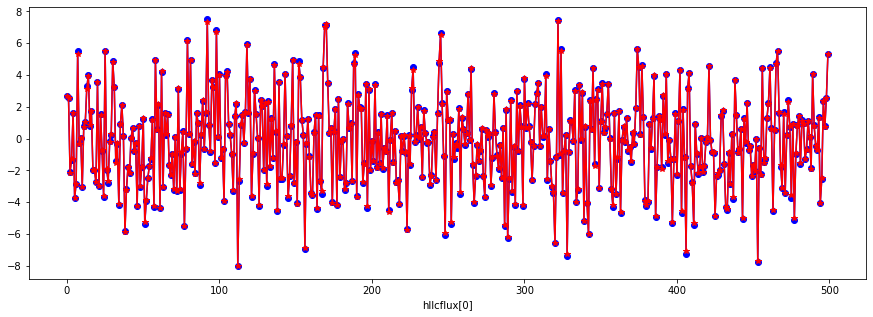

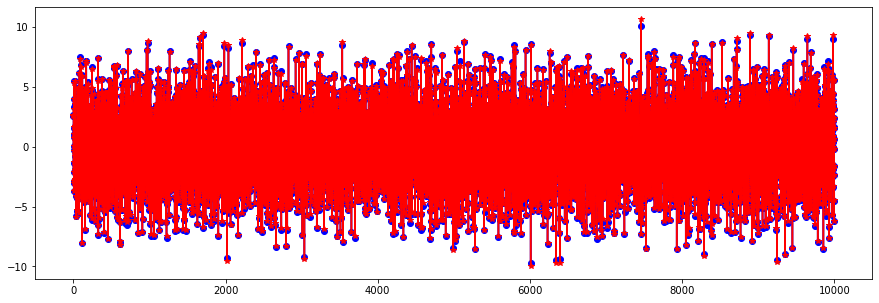

In [23]:
predictions = NN_model.predict(X_test)
l=[]
pred=predictions[0:500]
length=len(pred)
for i in range(0,length):
  l.append(i)
y=Y_test[0:500]
pred_train=NN_model.predict(X_train)
plt.figure(figsize=[15,5]);

plt.plot(l,pred[:,0],'-o',color='blue')
plt.plot(l,y['hllcflux[0]'],'-*', color='red')
plt.xlabel('hllcflux[0]')
plt.show()
k=[]
for i in range(0,len(predictions)):
  k.append(i)
plt.figure(figsize=[15,5]);
plt.plot(k,predictions[:,0],'-o',color='blue')
plt.plot(k,Y_test['hllcflux[0]'],'-*', color='red')


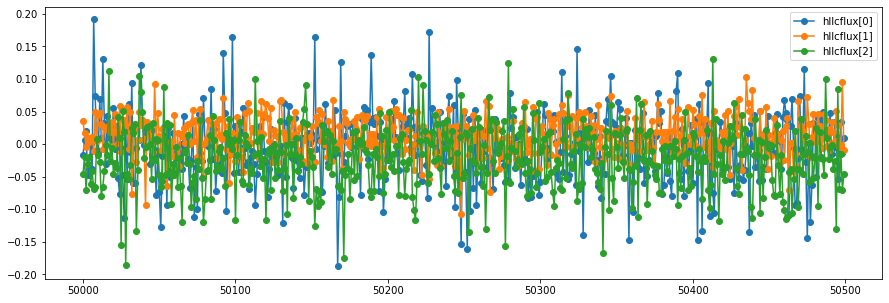

In [24]:
plt.figure(figsize=[15,5])
plt.plot(pred[:,0]-y['hllcflux[0]'],'o-',label='hllcflux[0]') #blue
plt.plot(pred[:,1]-y['hllcflux[1]'],'o-',label='hllcflux[1]')  #yellow
plt.plot(pred[:,2]-y['hllcflux[2]'],'o-',label='hllcflux[2]')  # green
plt.legend()
plt.show()


In [25]:
from sklearn.metrics import r2_score 
k=r2_score(Y_test,predictions)
print('r_square',k)
from sklearn.metrics import mean_squared_error
from math import sqrt
for i in range(0,3):
  s='hllcflux['+str(i)+']'
  t_est_1=sqrt(mean_squared_error(Y_test[s], predictions[:,i]))
  print (s,t_est_1)
#calculate RMSE
t_est=sqrt(mean_squared_error(Y_test, predictions)) #smaller rmse values - better fit
t_rain= sqrt(mean_squared_error(Y_train, pred_train))
print (t_est)
print(t_rain)

r_square 0.9930623204274749
hllcflux[0] 0.052794836054387916
hllcflux[1] 0.03455682185879111
hllcflux[2] 0.05513173984809145
0.04837691388003017
0.04796186050537468


In [26]:
import time
starttime=time.time()
NN_model.predict(X)
endtime=time.time()
print(endtime-starttime)
print(predictions)

1.130908727645874
[[ 2.6631205   1.5317388  -0.51757354]
 [ 2.5601869  -2.7935507  -0.17481387]
 [-2.1238027  -1.93334    -0.02823204]
 ...
 [ 1.6401807  -3.9649596   0.37527704]
 [ 0.60039544  3.6776602   0.03591293]
 [-4.502906    1.530427    0.16535407]]
